In [1]:
# Homework

# look up how to change the legend labels to the appropriate city
# look at bqplot, week 6 in dataviz,
    #make a few plots with different maps
    
# look at how data is collected. How are different data collectors 

# Where are datasets are coming from
# Whos colelctign it (Scientist, government, dod)?
# How is it being colelcted? What kind of temprautre since is it? How sensitive is the tempature? 
# What are the range of enviornments that the data is being colelcted? Is it open, is it in a enclosure, is it in a tree
# Be a Data Detective
    # Data from Star Track that has him wearing it and it says "Data Detective"

In [2]:
# for this first plot, follow Jill example from week 6 
import traitlets
import bqplot 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import ipywidgets
#from IPython.display import display

In [3]:
x = np.arange(100)
y = np.random.random(100) + 5
#x, y

In [4]:
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

In [5]:
lines = bqplot.Lines(x = x, y = y, scales={'x':x_sc, 'y':y_sc})

In [6]:
ax_x = bqplot.Axis(scale = x_sc, label='X Value')
ax_y = bqplot.Axis(scale = y_sc, label = 'Y Value', orientation='vertical')

In [25]:
# finally, we combine all these things together into a 
# bonified figure:
fig = bqplot.Figure(marks = [lines], axes = [ax_x, ax_y])
#display(fig)
# if you don't see the following fig, here is where
#  you might have to close and reopen your notebook
fig # note: just "fig" instead of "display(fig)" may also be an option for you

Figure(axes=[Axis(label='X Value', scale=LinearScale(), side='bottom'), Axis(label='Y Value', orientation='ver…

In [26]:
# ok, but this isn't interactive in anyway
# lets make it!!
pz = bqplot.interacts.PanZoom( scales = {'x': [x_sc], 'y': [y_sc]})

In [27]:
fig = bqplot.Figure(marks = [lines], axes = [ax_x, ax_y], interaction = pz)
display(fig)
# note that if I pan and zoom, the figure updates. Ooooo. fancy
#  note also, that the above figure also reacts as well
# this is because we are using the same lines & ax's objects (I think)

Figure(axes=[Axis(label='X Value', scale=LinearScale(), side='bottom'), Axis(label='Y Value', orientation='ver…

In [28]:
# lets see an example of where this can fail

# first lets make an x from 0-10 in 100 steps
x = np.mgrid[0.0:10.0:100j]
# and 2 y variables
y1 = x * 2
y2 = x**2

In [29]:
x_sc = bqplot.LinearScale(min = 1, max = 10)
# lets do one y-scale over linear and 1 over log
y_sc1 = bqplot.LinearScale(min = 1, max = 20)
y_sc2 = bqplot.LogScale(min = 1, max = 100)

In [30]:
# lets genrate lines for each y value
lines1 = bqplot.Lines(x = x, y = y1, scales = {'x': x_sc, 'y': y_sc1})
lines2 = bqplot.Lines(x = x, y = y2, scales = {'x': x_sc, 'y': y_sc2})

In [31]:
# and lets plot an x axis like before
ax_x = bqplot.Axis(scale = x_sc, label = 'X Value')
# and one y axis on the left
ax_y1 = bqplot.Axis(scale = y_sc1, label = 'Y1 Value', 
                    orientation = 'vertical')
# and one y-axis on the right
ax_y2 = bqplot.Axis(scale = y_sc2, label = 'Y2 Value', 
                    orientation = 'vertical', side = 'right')

In [33]:
# lets allow pan and zoom
pz = bqplot.interacts.PanZoom(scales = {'x': [x_sc], 
                                        'y': [y_sc1, y_sc2]})
#bqplot.interacts.PanZoom?
fig = bqplot.Figure(marks = [lines1, lines2], 
                    axes = [ax_x, ax_y1, ax_y2], interaction=pz)
#display(fig)
fig
# now we note if we zoom out too far, or pan to too negative of the x-axis
# we lose a line

# why? because the line is log-scaled, and log(numbers < 0) is undefined

# this is a way in which declaritive programming can fail because there
#  aren't obvious options to inhibit pan&zoom to a positive range

Figure(axes=[Axis(label='X Value', scale=LinearScale(max=3.7209794436367645, min=1.2286330903536118), side='bo…

In [34]:
# ok, lets do another quick interactive example using a scatter plot
x = np.random.random(100)
y = np.random.random(100)

In [35]:
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

x_ax = bqplot.Axis(scale = x_sc, label = 'X')
y_ax = bqplot.Axis(scale = y_sc, label = 'Y', orientation = 'vertical')

In [36]:
scatters = bqplot.Scatter(x = x,
                          y = y,
                          scales = {'x': x_sc, 'y': y_sc})

In [37]:
# now, lets create a selector to select points along the x-axis
selector = bqplot.interacts.FastIntervalSelector(
            scale = x_sc, marks = [scatters]) 
# we can also highlight what points we are selecting
scatters.unselected_style={'opacity': 0.8}
scatters.selected_style={'fill': 'red', 'stroke': 'yellow'}
# note we are selecing along the x-scale
fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax], interaction = selector)
display(fig)
# this might depend on what computer you are in, but on my mac, I click
#  to start selecting and then double click to "lock in" my selected
# region

Figure(axes=[Axis(label='X', scale=LinearScale(), side='bottom'), Axis(label='Y', orientation='vertical', scal…

In [38]:
# we can then print out what region is selected
selector.selected

In [39]:
# Lets try incorporating the data from the gloabal land temp csv
climate1 = pd.read_csv("/home/dgorrell/Downloads/GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity.csv")
climate1

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [40]:
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()
x_ax = bqplot.Axis(scale = x_sc)
y_ax = bqplot.Axis(scale = y_sc, orientation = 'vertical')

# (2) now, lets do an interactive rebinning, but lets
# use bqplot and a slider widget to do it
hist = bqplot.Hist(sample = climate1["dt"],
            scales = {'sample': x_sc, 'count': y_sc},
                   bins = 128, normalized = True,
                   colors = ["#FFFFFF"])

# lets also create a slider like we've done before
islider = ipywidgets.IntSlider(min = 8, max = 128, step = 1)
# and lets link our sider and our bins of our histogram
ipywidgets.link((islider, 'value'), (hist, 'bins'))
# construct a fig
#fig = bqplot.Figure(marks = [hist], axes = [x_ax, y_ax])
# ***RUN NEXT CELL BEFORE ADDING 2ND HIST

# (3) ok, but maybe we want to see our original histogram
#  underneath, lets add this to our figure
hist2 = bqplot.Hist(sample = climate1["dt"],
                   opacity = 0.1, normalized = True,
            scales = {'sample': x_sc, 'count': y_sc},
                  bins = 128)
fig = bqplot.Figure(marks = [hist, hist2], axes = [x_ax, y_ax])

# for 2 & 3
#display(ipywidgets.VBox([fig, islider]))
ipywidgets.VBox([fig, islider])

Hist(bins=128, colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], count=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.]), interactions={'hover': 'tooltip'}, midpoints=[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None

TypeError: 26.704 is not a string

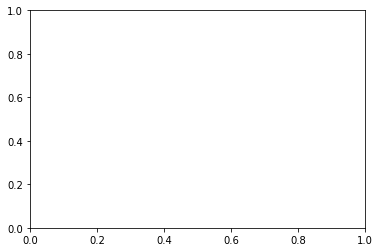

In [43]:
fig = plt.figure
plt.hist(climate1)
fig